# **Airline Loyalty Program**
Customer loyalty program data from Northern Lights Air (NLA), a fictitious airline based in Canada. In an effort to improve program enrollment, NLA ran a promotion between Feb - Apr 2018. Dataset includes loyalty program signups, enrollment and cancellation details, and additional customer information.







**(1) Import libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**(2) Upload and explore data set**

In [5]:
cfa = pd.read_csv("sample_data/Customer Flight Activity.csv")
clh = pd.read_csv("sample_data/Customer Loyalty History.csv")

In [6]:
#check first 5 rows of the df
cfa.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12.0,15276.0,22914.0,0.0,0.0
1,100590,2018,7,12.0,9168.0,13752.0,0.0,0.0
2,100590,2018,5,4.0,6504.0,9756.0,0.0,0.0
3,100590,2018,10,0.0,0.0,0.0,512.0,92.0
4,100590,2018,2,0.0,0.0,0.0,0.0,0.0


In [7]:
#check first 5 rows of the df
clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [8]:
#check data type
clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [29]:
#convert cancellation year and month to integer instead of decimal (float)
clh['Cancellation Year'] = clh['Cancellation Year'].astype('Int64')  # 'Int64' allows for NaN values
clh['Cancellation Month'] = clh['Cancellation Month'].astype('Int64')
clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   Int64  
 15  Cancellation Month  2067 non-null   Int64  
dtypes: I

In [9]:
cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loyalty Number               99323 non-null  int64  
 1   Year                         99323 non-null  int64  
 2   Month                        99323 non-null  int64  
 3   Total Flights                99322 non-null  float64
 4   Distance                     99322 non-null  float64
 5   Points Accumulated           99322 non-null  float64
 6   Points Redeemed              99322 non-null  float64
 7   Dollar Cost Points Redeemed  99322 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 6.1 MB


In [10]:
#count rows and columns
clh.shape

(16737, 16)

In [11]:
#check for null values
clh.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [12]:
#check for duplicated rows
clh.duplicated().sum()

0

**(3) Analyze Yearly Prformance**

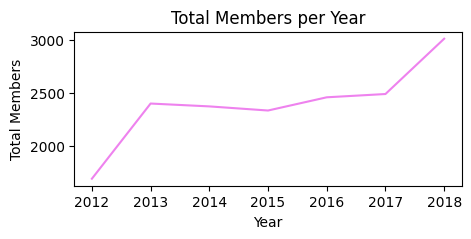

Enrollment Year
2012    1686
2013    2397
2014    2370
2015    2331
2016    2456
2017    2487
2018    3010
Name: Loyalty Number, dtype: int64

In [118]:
### get the number of loyalty program members per year

sum_e = clh.groupby('Enrollment Year')['Loyalty Number'].nunique()

#plot in a graph
plt.figure(figsize =(5,2))
sum_e.plot(kind='line',color='violet')
plt.xlabel("Year")
plt.ylabel("Total Members")
plt.title("Total Members per Year")
plt.show()

sum_e

**Checking the graph, we can see that the number of Airline Loyalty Program members has increased in the year 2018**

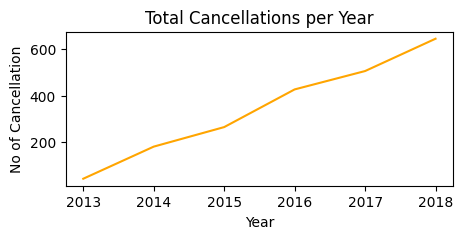

Cancellation Year
2013     43
2014    181
2015    265
2016    427
2017    506
2018    645
Name: Loyalty Number, dtype: int64

In [119]:
### get the number of loyalty program members that cancelled per year
sum_c = clh.groupby("Cancellation Year")['Loyalty Number'].nunique()

plt.figure(figsize=(5,2))
sum_c.plot(kind='line',color='orange')
plt.xlabel('Year')
plt.ylabel('No of Cancellation')
plt.title('Total Cancellations per Year')
plt.show()
sum_c

**Suprisingly, there is also an upward trend in the number of membership cancellations. Let's try to portray it in percentage.**

In [39]:
combined_totals = pd.concat([sum_e, sum_c], axis=1).fillna(0)
combined_totals.columns = ['Enrollments', 'Cancellations']
combined_totals['Total'] = combined_totals['Enrollments'] + combined_totals['Cancellations']

combined_totals['Enrollment_Share'] = (combined_totals['Enrollments'] / combined_totals['Total']) * 100 #convert to percentage
combined_totals['Enrollment_Share'] = combined_totals['Enrollment_Share'].round(2) #round off

combined_totals['Cancellation_Share'] = (combined_totals['Cancellations'] / combined_totals['Total']) * 100 #convert to percentage
combined_totals['Cancellation_Share'] = combined_totals['Cancellation_Share'].round(2) #round off

combined_totals.reset_index(inplace=True)
combined_totals.rename(columns={'index':'Year'},inplace=True)
combined_totals

,Year,Enrollments,Cancellations,Total,Enrollment_Share,Cancellation_Share
0,2012,1686,0.0,1686.0,100.00,0.00
1,2013,2397,43.0,2440.0,98.24,1.76
2,2014,2370,181.0,2551.0,92.90,7.10
3,2015,2331,265.0,2596.0,89.79,10.21
4,2016,2456,427.0,2883.0,85.19,14.81
5,2017,2487,506.0,2993.0,83.09,16.91
6,2018,3010,645.0,3655.0,82.35,17.65


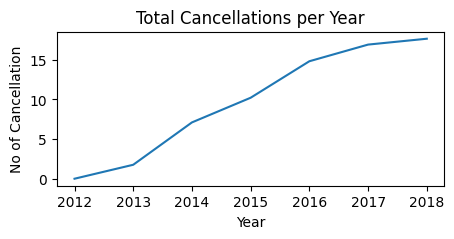

In [120]:
### get the number of loyalty program members that cancelled per year

plt.figure(figsize=(5,2))
plt.plot(combined_totals['Year'],combined_totals['Cancellation_Share'])
plt.xlabel('Year')
plt.ylabel('No of Cancellation')
plt.title('Total Cancellations per Year')
plt.show()


**Here, we're able to verify that the percentage of cancellations have increased and occured the most in 2018.**

**Let us the history of enrollees in past months each year.**

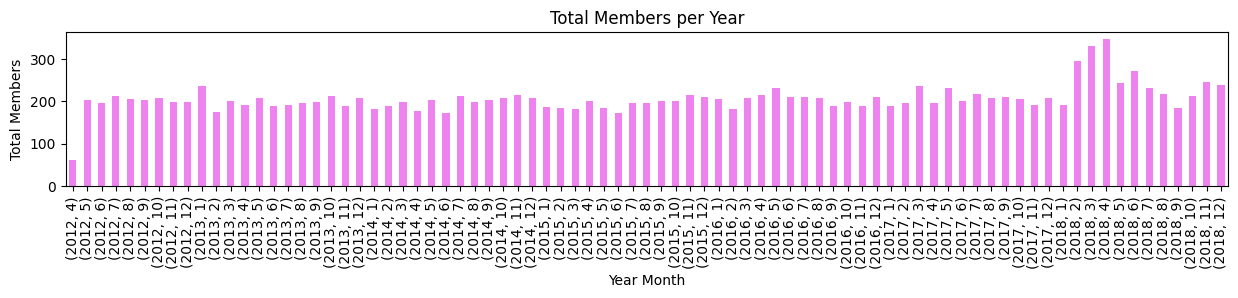

In [122]:
sum_e_m = clh.groupby(['Enrollment Year','Enrollment Month'])['Loyalty Number'].nunique()

plt.figure(figsize=(15,2))
sum_e_m.plot(kind='bar',color='violet')
plt.xlabel("Year Month")
plt.ylabel("Total Members")
plt.title("Total Members per Year")
plt.show()

**Here, we can see that in 2018 of Feb, March and April there is a huge number of new enrollees versus the previous years of the same month.**

Let's check the total flights accumulated per month year

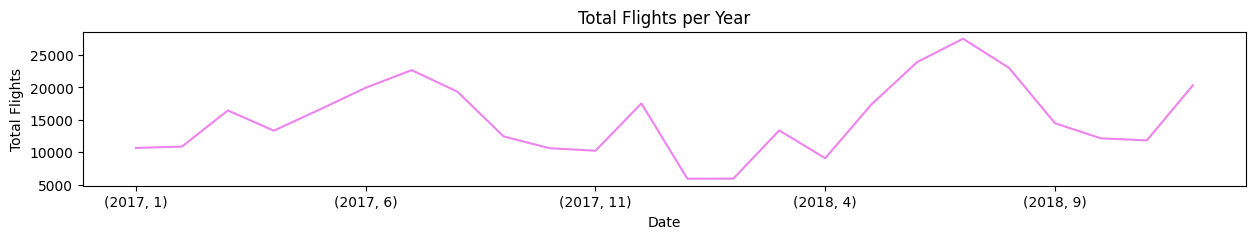

Year  Month
2017  1        10666.0
      2        10873.0
      3        16449.0
      4        13331.0
      5        16598.0
      6        19953.0
      7        22675.0
      8        19326.0
      9        12442.0
      10       10624.0
      11       10235.0
      12       17533.0
2018  1         5913.0
      2         5924.0
      3        13369.0
      4         9076.0
      5        17333.0
      6        23916.0
      7        27521.0
      8        23023.0
      9        14481.0
      10       12148.0
      11       11827.0
      12       20322.0
Name: Total Flights, dtype: float64

In [123]:
sum_tf = cfa.groupby(['Year', 'Month'])['Total Flights'].sum()

plt.figure(figsize=(15,2))
sum_tf.plot(kind='line',color='violet')
plt.xlabel("Date")
plt.ylabel("Total Flights")
plt.title("Total Flights per Year")
plt.show()
sum_tf

**We can see that there is a slight dip in total flights in the month of Jan and Feb 2018**

Let us also check the total flights accumulated per Enrollment period

In [89]:
#first merge the 2 data set
merge_df = pd.merge(cfa,clh, on = 'Loyalty Number')
merge_df.head()


,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100590,2018,6,12.0,15276.0,22914.0,0.0,0.0,Canada,British Columbia,...,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,<NA>,<NA>
1,100590,2018,7,12.0,9168.0,13752.0,0.0,0.0,Canada,British Columbia,...,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,<NA>,<NA>
2,100590,2018,5,4.0,6504.0,9756.0,0.0,0.0,Canada,British Columbia,...,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,<NA>,<NA>
3,100590,2018,10,0.0,0.0,0.0,512.0,92.0,Canada,British Columbia,...,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,<NA>,<NA>
4,100590,2018,2,0.0,0.0,0.0,0.0,0.0,Canada,British Columbia,...,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,<NA>,<NA>


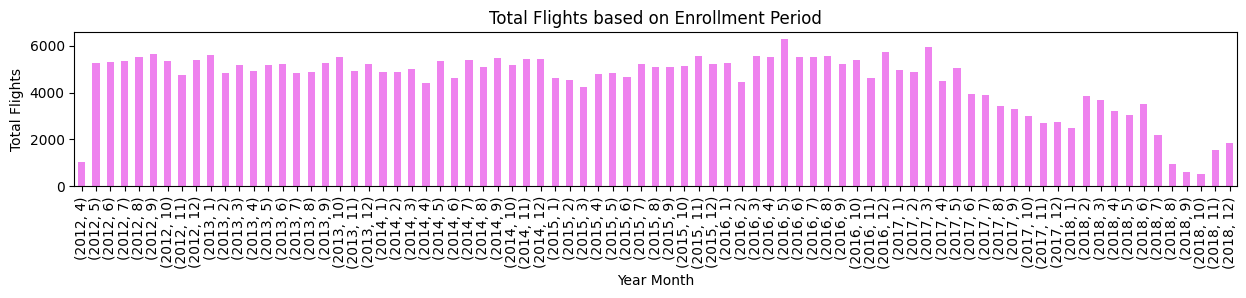

In [124]:
sum_tf_merge = merge_df.groupby(['Enrollment Year','Enrollment Month'])['Total Flights'].sum()

plt.figure(figsize=(15,2))
sum_tf_merge.plot(kind='bar',color='violet')
plt.xlabel("Year Month")
plt.ylabel("Total Flights")
plt.title("Total Flights based on Enrollment Period")
plt.show()

**Now, let's focus our analysis in months of 2018 where the Airline launched their Loyalty Program campaign which is from Feb to April**

In [101]:
merge_df_feb_april_2018 = merge_df[(merge_df['Enrollment Year'] == 2018) & (merge_df['Enrollment Month'] >= 2) & (merge_df['Enrollment Month'] <=4)]
merge_df_feb_april_2018['Enrollment Year'].unique()
#merge_df_feb_april_2018['Enrollment Month'].unique()

array([2018])

First, let's get the flight activity of those members enrolled during the campaign

In [102]:
clh_feb_april_2018 = clh[(clh['Enrollment Year'] == 2018) & (clh['Enrollment Month'] >= 2) & (clh['Enrollment Month'] <=4)]
clh_feb_april_2018['Enrollment Month'].unique()
#merge_df_feb_april_2018['Enrollment Month'].unique()

array([3, 4, 2])

In [104]:
new_member_id = clh_feb_april_2018['Loyalty Number']
flight_details_2018_enrollees = cfa[cfa['Loyalty Number'].isin(new_member_id)]

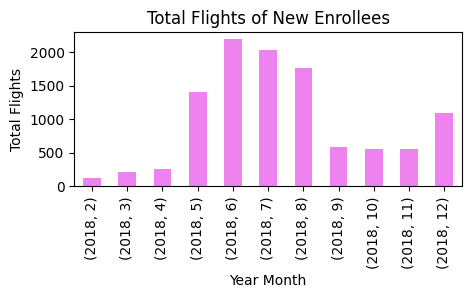

Year  Month
2018  2         127.0
      3         205.0
      4         252.0
      5        1404.0
      6        2192.0
      7        2028.0
      8        1760.0
      9         580.0
      10        558.0
      11        548.0
      12       1095.0
Name: Total Flights, dtype: float64

In [125]:
sum_tf_2018= flight_details_2018_enrollees.groupby(['Year','Month'])['Total Flights'].sum()

plt.figure(figsize=(5,2))
sum_tf_2018.plot(kind='bar',color='violet')
plt.xlabel("Year Month")
plt.ylabel("Total Flights")
plt.title("Total Flights of New Enrollees")
plt.show()
sum_tf_2018

**The graph shows that most of the new members have travelled in the month of June, July and August 201**8

**Let's see the demographics that composed the new enrollees during the airline campaign in 2018**

Check the number of enrollees in each city location

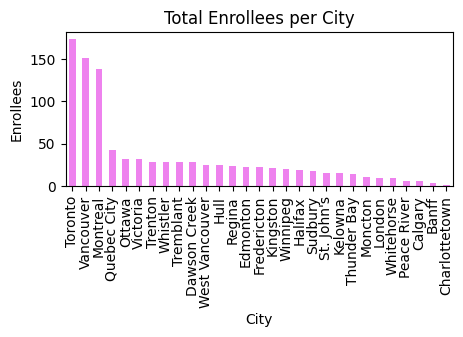

City
Toronto           173
Vancouver         151
Montreal          138
Quebec City        42
Ottawa             32
Victoria           32
Trenton            29
Whistler           29
Tremblant          28
Dawson Creek       28
West Vancouver     25
Hull               25
Regina             24
Edmonton           23
Fredericton        22
Kingston           21
Winnipeg           20
Halifax            19
Sudbury            18
St. John's         16
Kelowna            15
Thunder Bay        14
Moncton            11
London             10
Whitehorse          9
Peace River         6
Calgary             6
Banff               4
Charlottetown       1
Name: Loyalty Number, dtype: int64

In [126]:
sum_city = clh_feb_april_2018.groupby('City')['Loyalty Number'].nunique().sort_values(ascending=False)

plt.figure(figsize=(5,2))
sum_city.plot(kind='bar',color='violet')
plt.xlabel("City")
plt.ylabel("Enrollees")
plt.title("Total Enrollees per City")
plt.show()

sum_city

**The top 3 cities with large number of enrollees are Toronto, Vancouver and Montreal**

Using a pie chart, let's visualize the percentage of male and female that enrolled during the campaign

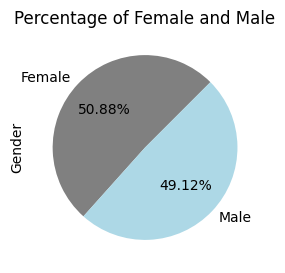

Female    494
Male      477
Name: Gender, dtype: int64

In [127]:
# Count the occurrences of each gender
gender_counts = clh_feb_april_2018['Gender'].value_counts()
# Plot a pie chart
plt.figure(figsize=(3, 3))
gender_counts.plot.pie(autopct='%1.2f%%', labels=gender_counts.index, colors=['gray', 'lightblue'], startangle=45)
plt.title('Percentage of Female and Male')
plt.show()
gender_counts

**Here we can see that there is not much of a difference in the number of enrollees per gender**

Let's try with the marital status

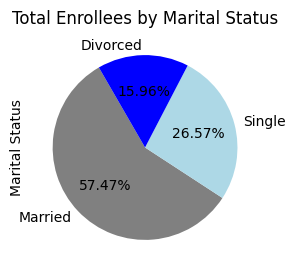

Married     558
Single      258
Divorced    155
Name: Marital Status, dtype: int64

In [128]:
# Count the occurrences of each gender
status_counts = clh_feb_april_2018['Marital Status'].value_counts()
# Plot a pie chart
plt.figure(figsize=(3, 3))
status_counts.plot.pie(autopct='%1.2f%%', labels=status_counts.index, colors=['gray', 'lightblue', 'blue'], startangle=120)
plt.title('Total Enrollees by Marital Status')
plt.show()
status_counts

**We see here that more than half of our new enrollees are married, followed by single members**

Now, let's check how many of those who enrolled during the campaign have cancelled

In [110]:
new_member_id = clh_feb_april_2018['Loyalty Number']
cancelled_member = clh[clh['Loyalty Number'].isin(new_member_id)]

In [113]:
cancelled_member['Enrollment Month'].unique()

array([3, 4, 2])

In [115]:
#count of new memberw who cancelled
cancelled_count = cancelled_member['Cancellation Year'].count()
cancelled_count

115

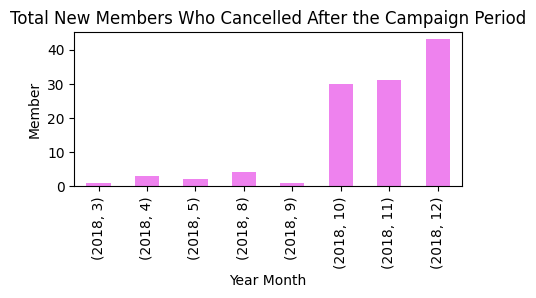

In [129]:
sum_cM = cancelled_member.groupby(['Cancellation Year', 'Cancellation Month'])['Loyalty Number'].nunique()

plt.figure(figsize=(5,2))
sum_cM.plot(kind='bar',color='violet')
plt.xlabel("Year Month")
plt.ylabel("Member")
plt.title("Total New Members Who Cancelled After the Campaign Period")
plt.show()

# Conclusion

After performing the above analysis, we have concluded that the campaign launched in 2018 have created a signigicant impact in its number of loyalty program members and total flights. The following insights have also been concluded:



1.   The top 3 cities with large number of enrollees are Toronto, Vancouver and Montreal
2.   More than half of the population who took advantage of the promotion were married, followed by single consumers.
3.  Those who have enrolled during the campaign have booked their flight mostly in the months of June, July, August, May, and December.
4.  Although this campaign can be concluded successful, 115 out of 971 new members have cancelled on the same year mostly in the month of December.

